In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('Bank Customer Churn Prediction.csv')

## EDA

### Reading data

In [4]:
df.head(10)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [5]:
df.shape  # 10000 rows(customer) and 12 columns (features)

(10000, 12)

In [6]:
df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [8]:
df.isnull().sum()  # no missing values in the dataset

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

### Statistical Outlier Detection (IQR Method)


###### After handling missing values, I performed an outlier analysis using the Interquartile Range (IQR) method to ensure data integrity:
###### Age Outliers: A total of 359 outliers were identified, mainly representing senior citizens (above 70-80 years old).
###### Balance Outliers: No extreme outliers were found that fall outside the logical banking range, though the distribution is influenced by zero-balance accounts.
###### Handling Decision: I decided to retain all outliers. In churn prediction, extreme values (like very high age or specific balance patterns) often carry significant predictive power. Removing them could lead to losing critical information about high-risk customer segments.

In [9]:
# Function to calculate the number of outliers using IQR
def count_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers)

# Checking Outliers for key numerical columns
age_outliers = count_outliers(df, 'age')
balance_outliers = count_outliers(df, 'balance')

print(f"Number of outliers in Age: {age_outliers}")
print(f"Number of outliers in Balance: {balance_outliers}")

Number of outliers in Age: 359
Number of outliers in Balance: 0


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

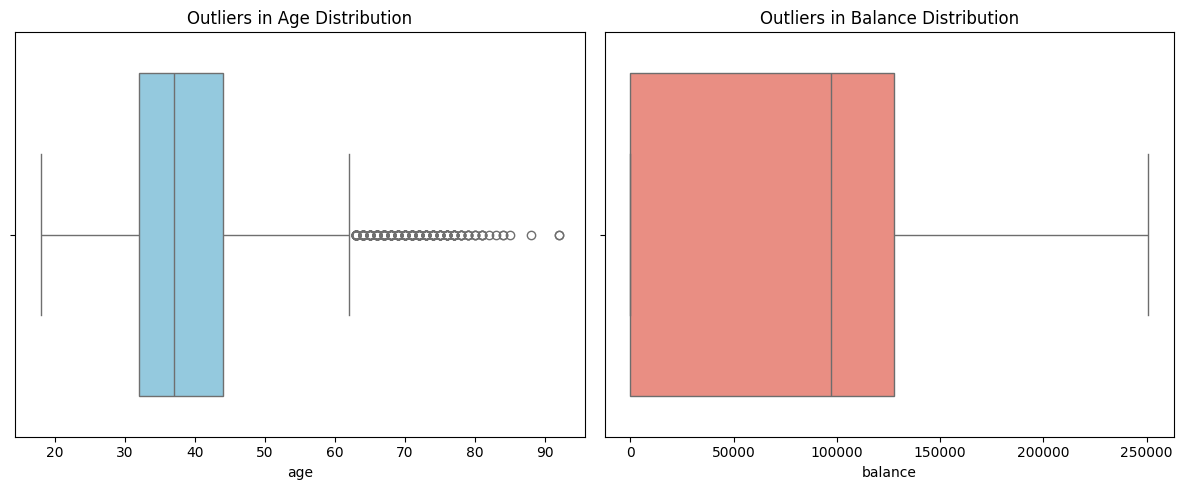

In [11]:
# Plotting Box Plots to visualize outliers
plt.figure(figsize=(12, 5))

# Subplot for Age
plt.subplot(1, 2, 1)
sns.boxplot(x=df['age'], color='skyblue')
plt.title('Outliers in Age Distribution')

# Subplot for Balance
plt.subplot(1, 2, 2)
sns.boxplot(x=df['balance'], color='salmon')
plt.title('Outliers in Balance Distribution')

plt.tight_layout()
plt.show()

In [12]:
import numpy as np

In [13]:
df.isnull().sum()  # no missing values now

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [14]:
df['churn'].value_counts()
# 0 --> cutomer stayed, 1 --> customer left
# imbalanced data (customer stayed >> customer left)

churn
0    7963
1    2037
Name: count, dtype: int64

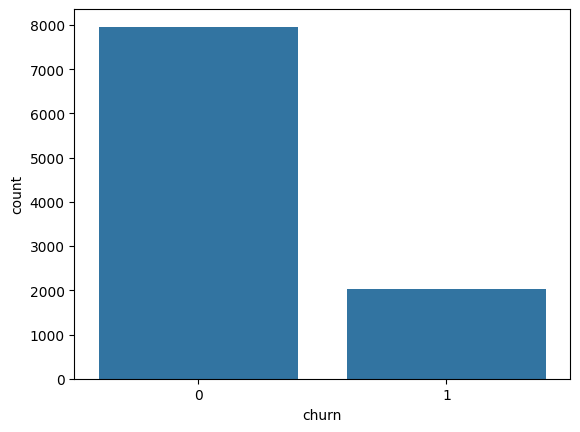

In [15]:
sns.countplot(x='churn', data=df)
plt.show()

### Numerical data

In [16]:
df.describe() # statistical summary of numerical columns
# --- Key Insight on Balance Column ---
# 1. Mean (77.5k) is lower than Median (97.3k). 
# 2. This happens because the first 25% of customers have a 0.0 balance (Min and 25% are both 0).
# 3. These "Zero-balance" customers act as outliers that pull the average (Mean) down.

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


As we can see here, the Median(50%) is higher than the Mean, which indicates a Left-Skewed distribution of non-zero balances, heavily influenced by the 25% of customers with zero balance

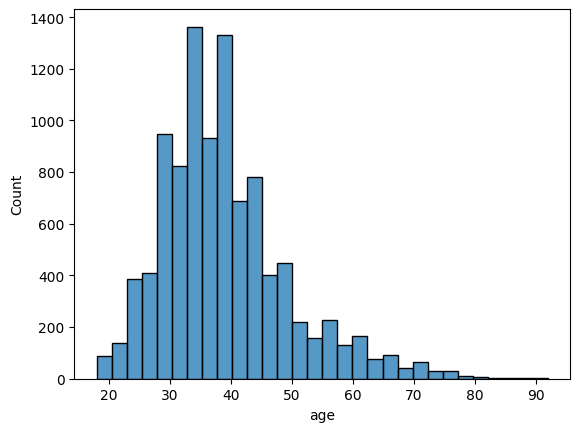

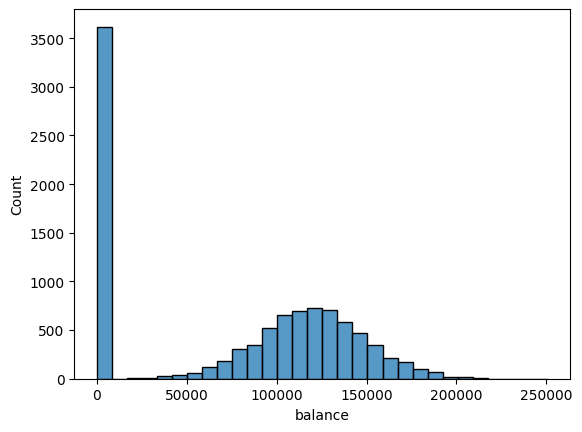

In [17]:
sns.histplot(df['age'], bins=30)
plt.show()
sns.histplot(df['balance'], bins=30)
plt.show()

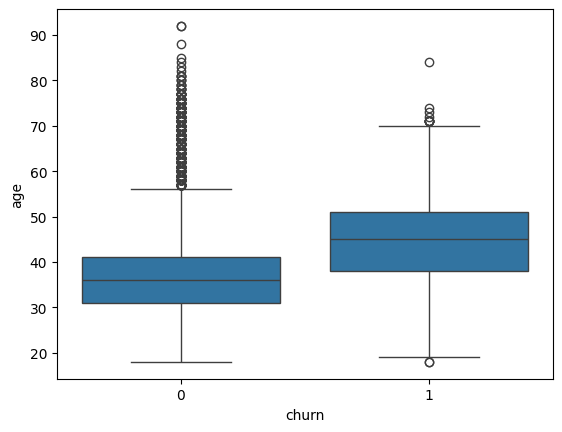

In [18]:
sns.boxplot(x='churn', y='age', data=df) # boxplot to see age distribution of cutomers that left vs stayed
plt.show()

### categorical data

In [19]:
df['country'].value_counts()

country
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

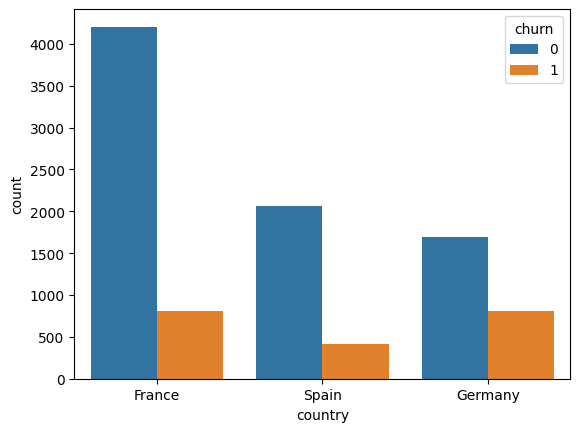

In [20]:
sns.countplot(x='country', hue='churn', data=df)
plt.show()
# --- Key Insight on Country vs Churn ---
# 1. France has the largest customer base (blue bars) among the three countries.
# 2. Germany shows a significantly higher "churn rate" (the orange bar is almost half the blue bar).
# 3. Spain appears to be the most stable market with the lowest churn numbers.
# 4. customers in Germany are leaving at a higher percentage compared to France and Spain.

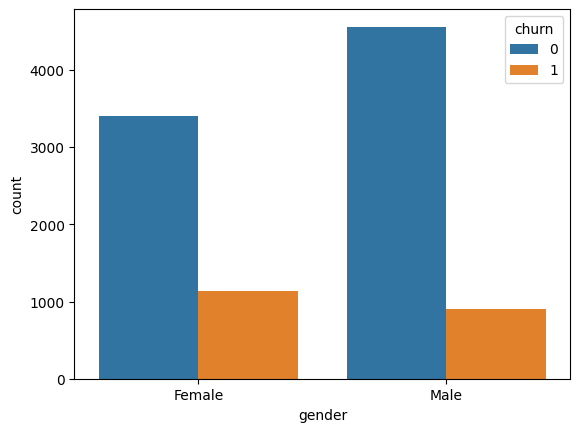

In [21]:
sns.countplot(x='gender', hue='churn', data=df)
plt.show()
# --- Key Insight on Gender vs Churn ---
# 1. The customer base is almost evenly split between males and females.
# 2. However, females show a slightly higher churn rate compared to males.
# 3. This could indicate that female customers are more likely to leave the bank than male customers.

In [22]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


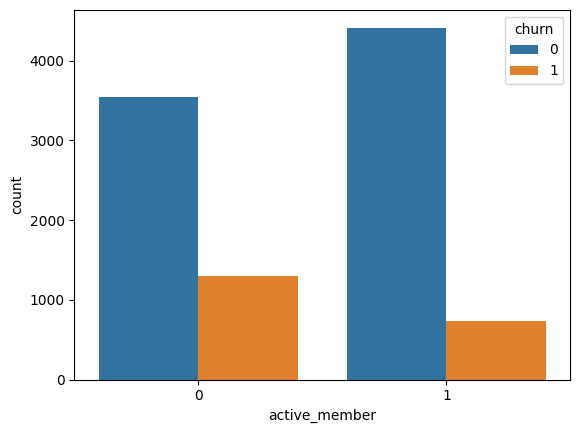

In [23]:
sns.countplot(x='active_member', hue='churn', data=df)
plt.show()
# --- Key Insight on Active Member vs Churn ---
# 1. Active members (blue bars) are significantly more likely to stay with the bank
# 2. Inactive members (orange bars) show a much higher churn rate.

### Feature Engineering

In [24]:


df["AgeGroup"] = pd.cut(
    df["age"],
    bins=[18,30,40,50,60,100],
    labels=["18-30","30-40","40-50","50-60","60+"]
)


In [25]:
categorical_features = [
    "Geography",
    "Gender",
    "HasCrCard",
    "active_member", "AgeGroup"
]

numerical_features = [
    "CreditScore",
    "age",
    "tenure",
    "balance",
    "NumOfProducts",
    "EstimatedSalary"
]

df_features = pd.DataFrame({
    'Feature Type': ['Categorical'] * len(categorical_features) + ['Numerical'] * len(numerical_features),
    'Feature Name': categorical_features + numerical_features
})

print("--- Project Features Summary ---")
print(df_features)

--- Project Features Summary ---
   Feature Type     Feature Name
0   Categorical        Geography
1   Categorical           Gender
2   Categorical        HasCrCard
3   Categorical    active_member
4   Categorical         AgeGroup
5     Numerical      CreditScore
6     Numerical              age
7     Numerical           tenure
8     Numerical          balance
9     Numerical    NumOfProducts
10    Numerical  EstimatedSalary


### correlation

In [26]:
df_numeric = df.select_dtypes(include=['int64', 'float64'])
# here I used only the numerical columns for correlation heatmap and excluded categorical columns
# I kept the categorical columns as they are during the EDA phase (didn't encode it) 
# to ensure that visualizations and insights remain human-readable .
# This helps in avoiding "Data Leakage"

The correlation heatmap showed me which features have the strongest relationship with the customer's decision to leave. For example, if Age has a high positive correlation, it means older customers are more likely to churn

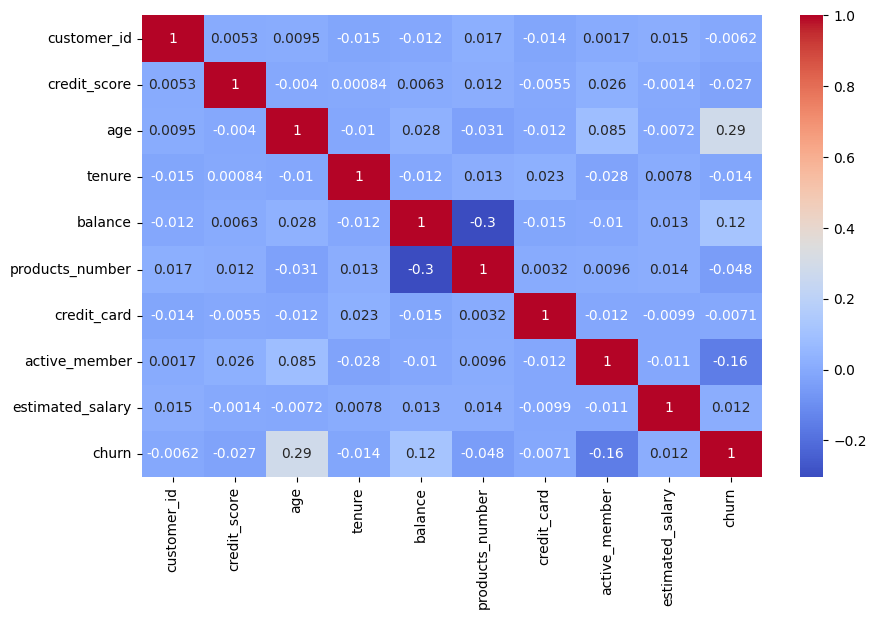

In [27]:
plt.figure(figsize=(10,6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.show()

In [28]:
# I performed the Train-Test Split at this stage before any preprocessing
# This prevents Data Leakage, ensuring that the model does not learn anything 
# from the test set during the cleaning process

from sklearn.model_selection import train_test_split

# I dropped the 'churn' column from X as it is the label we want to predict
X = df.drop('churn', axis=1) 
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

# I splitted the data into 80% training and 20% testing
# I used "stratify=y" to ensure that both sets have the same proportion 
# of classes as the original dataset

Training set size: (8000, 12)
Testing set size: (2000, 12)


In [29]:
X.shape 

(10000, 12)

## data preprocessing

#### Adding and removing NAN's

In [30]:
import numpy as np
# here I will add some NANs to simulate missing values
np.random.seed(42)

for col in ['age', 'balance', 'estimated_salary']:
    df.loc[df.sample(frac=0.05).index, col] = np.nan
df.isnull().sum()  # checking the number of missing values after adding NANs
# Handling missing values by filling them with the median of each column
# (median is better for numerical data with outliers)

df['age'].fillna(df['age'].median(), inplace=True)
df['balance'].fillna(df['balance'].median(), inplace=True)
df['estimated_salary'].fillna(df['estimated_salary'].median(), inplace=True)
df['AgeGroup'].fillna(df["AgeGroup"].mode()[0], inplace=True)
X.select_dtypes(include='object').columns
# Categorical columns that need encoding

C:\Users\Tasneem Ayman\AppData\Local\Temp\ipykernel_8044\1174164833.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
C:\Users\Tasneem Ayman\AppData\Local\Temp\ipykernel_8044\1174164833.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

Index(['country', 'gender'], dtype='object')

In [31]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
AgeGroup            0
dtype: int64

### Train test split 

In [32]:

from sklearn.model_selection import train_test_split
X = df.drop("churn", axis=1)
y = df["churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [33]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, OneHotEncoder


preprocessor = ColumnTransformer(
    transformers=[
        ("num", RobustScaler(), numerical_features),
        ("cat", OneHotEncoder(drop="first"), categorical_features)
    ]
)


### Scaling

In [34]:
from sklearn.preprocessing import RobustScaler
import joblib

numerical_features = ["credit_score", "age", "tenure", "balance", "products_number", "estimated_salary"]

scaler = RobustScaler()

X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])

X_test[numerical_features] = scaler.transform(X_test[numerical_features])

joblib.dump(scaler, 'scaler.pkl')

print(" Success: Robust Scaling applied only to Numerical features.")
X_test_scaled = X_test.copy()
X_train_scaled = X_train.copy()

# I chose RobustScaler instead of StandardScaler for the following reasons:
# Handling Skewed Data: Our features (like Balance and EstimatedSalary) are right-skewed,
# RobustScaler is specifically designed to handle such distributions by using the Median and Interquartile Range (IQR).
# it helps algorithms like Logistic Regression or SVM to converge faster and perform better

 Success: Robust Scaling applied only to Numerical features.


### Encoding 

#### I used one-Hot Encoding because it is nominal categorical data not ordinal

In [35]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# 1. Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# 2. Create encoder 
encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

# 3. Fit and Transform training data
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])

# 4. Transform test data
X_test_encoded = encoder.transform(X_test[categorical_cols])

# 5. Get feature names
encoded_cols = encoder.get_feature_names_out(categorical_cols)

# 6. Create DataFrames with matching index
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoded_cols, index=X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoded_cols, index=X_test.index)

# 7. Final Join: Drop old columns and add new ones
X_train = pd.concat([X_train.drop(columns=categorical_cols), X_train_encoded_df], axis=1)
X_test = pd.concat([X_test.drop(columns=categorical_cols), X_test_encoded_df], axis=1)

print("Encoding successful! Shape matches.")


Encoding successful! Shape matches.


### Imbalanced: X_train_resampled

In [36]:
import pandas as pd


train_counts = pd.Series(y_train).value_counts()
test_counts = pd.Series(y_test).value_counts()


imbalance_df = pd.DataFrame({
    'Train Set (Count)': train_counts,
    'Train Set (%)': (train_counts / len(y_train) * 100).round(2),
    'Test Set (Count)': test_counts,
    'Test Set (%)': (test_counts / len(y_test) * 100).round(2)
})


imbalance_df.index = ['Stayed (Class 0)', 'Churned (Class 1)']

print("--- Data Distribution Before SMOTE ---")
display(imbalance_df)

--- Data Distribution Before SMOTE ---


,Train Set (Count),Train Set (%),Test Set (Count),Test Set (%)
Stayed (Class 0),6370,79.62,1593,79.65
Churned (Class 1),1630,20.38,407,20.35


In [37]:
! pip install imbalanced-learn 

##### smote

In [38]:
X_train = X_train.drop(columns=['AgeGroup'])

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("✅ SMOTE Applied Successfully!")
print(f"Shape after SMOTE: {X_train_resampled.shape}")

✅ SMOTE Applied Successfully!
Shape after SMOTE: (12740, 12)


c:\Users\Tasneem Ayman\anaconda3\envs\churn_project\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [39]:
X_train.shape
# the train rows took 8000 from the total 10000 rows which is 80%  
# the column numbers is the same in the train and test sets as the model should 
# learn on the same features during training and testing

(8000, 12)

In [40]:
X_test.shape
# the test rows took 2000 from the total 10000 rows which is 20%

(2000, 13)

### Modeling

#### 1) Precision answers: "Of all customers predicted as churn, how many actually churned?" , High precision means fewer false alarms.

#### 2) ***Recall answers: "Of all customers who actually churned, how many did the model catch?" , High recall is critical in churn prediction to avoid missing at-risk customers.

#### 3) F1-score is the balance between precision and recall ,                  It is especially useful when dealing with imbalanced datasets like churn data.

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(probability=True)
}


In [42]:
from sklearn.model_selection import cross_val_score

for name, model in models.items():
    scores = cross_val_score(model, X_train_resampled, y_train_resampled,
                             cv=5, scoring="recall")
    print(f"{name} Recall: {scores.mean():.3f}")


Logistic Regression Recall: 0.610
Random Forest Recall: 0.850
Gradient Boosting Recall: 0.834
SVM Recall: 0.526


In [43]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [100, 200],
    "learning_rate": [0.01, 0.1],
    "max_depth": [3, 5]
}

grid = GridSearchCV(
    GradientBoostingClassifier(),
    param_grid,
    cv=5,
    scoring="recall"
)

grid.fit(X_train_resampled, y_train_resampled)

best_model = grid.best_estimator_



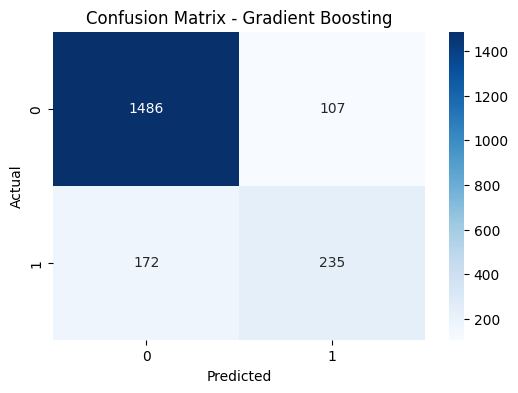

In [44]:
X_test = X_test.drop(columns=['AgeGroup'])
y_pred = best_model.predict(X_test)
# Visualizing the Confusion Matrix for Gradient Boosting Model
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred )

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Gradient Boosting")
plt.show()

#The most critical error is predicting a churned customer as non-churned
#because the company loses the opportunity to take preventive action

##### Pipeline 

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.ensemble import GradientBoostingClassifier
import pickle

numeric_features = ["credit_score", "age", "balance",
                    "tenure", "products_number",
                    "estimated_salary"]

categorical_features = ["country", "gender"]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", RobustScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", GradientBoostingClassifier())
])

pipeline.fit(X, y)


with open("churn_pipeline.pkl", "wb") as f:
    pickle.dump(pipeline, f)




#### saving the model

In [47]:
import joblib # joblib is used for saving the model

joblib.dump(best_model, "model.pkl")
joblib.dump(scaler, "scaler.pkl")

#I saved the trained model and scaler to ensure
#consistent preprocessing during deployment

['scaler.pkl']

### ROC Curve

#### Initially I used predictions but I want to make the Recall better so I will use The ROC curve 

In [48]:
model.fit(X_train_resampled, y_train_resampled)
# Get predicted probabilities for the positive class (Churn = 1)
y_probs = model.predict_proba(X_test_scaled)[:, 1]
# Instead of only using class predictions, 
# I extracted predicted probabilities to evaluate model performance across different thresholds

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- AgeGroup
- country
- gender
Feature names seen at fit time, yet now missing:
- country_Germany
- country_Spain
- gender_Male


ROC curve helped me analyze model performance across all possible thresholds
AUC measures how well the model separates churn from non-churn customers


In [49]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate ROC values
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_probs)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.show()

print("AUC Score:", auc_score)


NameError: name 'y_probs' is not defined

$$J = True\ Positive\ Rate\ (TPR) - False\ Positive\ Rate\ (FPR)$$
$$TPR --> sensitivity  , FPR --> (1-specifity)$$

In [ ]:
import numpy as np

# Use Youden’s J statistic to find optimal threshold
j_scores = tpr - fpr
best_index = np.argmax(j_scores)
best_threshold = thresholds[best_index]

print("Best Threshold from ROC:", best_threshold)


Best Threshold from ROC: 0.37829472588495267


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred_new = (y_probs >= best_threshold).astype(int) 
print("Classification Report (Optimized Threshold)") 
print(classification_report(y_test, y_pred_new)) 
print("Confusion Matrix:") 
print(confusion_matrix(y_test, y_pred_new))


Classification Report (Optimized Threshold)
              precision    recall  f1-score   support

           0       0.93      0.29      0.45      1593
           1       0.25      0.91      0.39       407

    accuracy                           0.42      2000
   macro avg       0.59      0.60      0.42      2000
weighted avg       0.79      0.42      0.44      2000

Confusion Matrix:
[[ 469 1124]
 [  37  370]]


I think it's clear now why I used ROC curve 
The recall before was 48.7% and now it"s 79% 

### Deployment

In [50]:
import streamlit as st
import joblib
import numpy as np
import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(model, f, protocol=5)

In [51]:
from sklearn.metrics import classification_report
model = GradientBoostingClassifier(n_estimators=100, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


joblib.dump(model, "gradient_boosting_churn_model.pkl")

              precision    recall  f1-score   support

           0       0.89      0.94      0.92      1593
           1       0.71      0.56      0.63       407

    accuracy                           0.86      2000
   macro avg       0.80      0.75      0.77      2000
weighted avg       0.86      0.86      0.86      2000



['gradient_boosting_churn_model.pkl']

In [52]:
# Inputs
age = st.number_input("Age", 18, 100)
balance = st.number_input("Balance")
credit_score = st.number_input("Credit Score", 300, 900)
products = st.number_input("Number of Products", 1, 4)
is_active = st.selectbox("Is Active Member?", [0, 1])
salary = st.number_input("Estimated Salary")

if st.button("Predict Churn"):
    data = np.array([[credit_score, age, balance, products, is_active, salary]])
    data = scaler.transform(data)

    prediction = model.predict(data)

    if prediction[0] == 1:
        st.error("⚠️ Customer is likely to churn")
    else:
        st.success("✅ Customer is likely to stay")

2026-02-17 19:41:58.358 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-17 19:41:58.359 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-17 19:41:58.360 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-17 19:41:58.363 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-17 19:41:58.365 WARNING streamlit.runtime.state.session_state_proxy: Session state does not function when running a script without `streamlit run`
2026-02-17 19:41:58.366 WARNING streamlit.runtime.scriptrunner_utils.script_run_c

In [53]:
import sklearn
print(sklearn.__version__)


1.6.1
